# Context

- The data is about movies and actors information from 1990 to 2021. 
- We'll use Python to:
  - Import data
  - Explore data
  - Filter data  
  - Convert dtypes
  - Extract datetime
  - Sort data
  - Calculate summary statistics (groupby)
  - Visualize data

## Install Python, popular libraries, JupyterLab through the Anaconda Distribution
https://www.anaconda.com/products/individual

If need help with basic Python or installation, take our *free* Python crash course

## Import the libraries

In [1]:
import pandas as pd
import seaborn as sns

## Load data as a pandas DataFrame

Save the csv file under the same directory as the notebook, if not typing the full path.

In [2]:
df_movie_actors = pd.read_csv('movie_actors.csv')

## Look at the info summary of the DataFrame

In [3]:
df_movie_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165130 entries, 0 to 165129
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            165130 non-null  int64  
 1   movie_title         165130 non-null  object 
 2   movie_popularity    165130 non-null  float64
 3   movie_release_date  165130 non-null  object 
 4   movie_budget        165130 non-null  int64  
 5   movie_revenue       165130 non-null  int64  
 6   actor_id            165130 non-null  int64  
 7   actor_name          165130 non-null  object 
 8   actor_order         165130 non-null  int64  
 9   actor_gender        165130 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 12.6+ MB


## Look at the first few rows of the DataFrame

In [4]:
df_movie_actors.head()

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
0,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,11768,Patricia Tallman,0,1
1,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,19384,Tony Todd,1,2
2,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27736,Tom Towles,2,2
3,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,90653,McKee Anderson,3,0
4,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27737,Bill Moseley,4,2


## Check for the count of unique values in each column

In [5]:
df_movie_actors.nunique()

movie_id               4960
movie_title            4911
movie_popularity       4499
movie_release_date     3321
movie_budget            524
movie_revenue          4769
actor_id              83607
actor_name            82770
actor_order             249
actor_gender              4
dtype: int64

## Investigate the column `actor_gender`

In [6]:
df_movie_actors['actor_gender']

0         1
1         2
2         2
3         0
4         2
         ..
165125    0
165126    0
165127    0
165128    0
165129    0
Name: actor_gender, Length: 165130, dtype: int64

In [7]:
df_movie_actors['actor_gender'].value_counts()

2    80377
0    43573
1    41137
3       43
Name: actor_gender, dtype: int64

In [8]:
df_movie_actors['actor_gender'] == 2

0         False
1          True
2          True
3         False
4          True
          ...  
165125    False
165126    False
165127    False
165128    False
165129    False
Name: actor_gender, Length: 165130, dtype: bool

In [9]:
df_movie_actors[df_movie_actors['actor_gender'] == 2] # male

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
1,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,19384,Tony Todd,1,2
2,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,27736,Tom Towles,2,2
4,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,27737,Bill Moseley,4,2
5,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,81460,William Butler,5,2
8,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,1316938,David W. Butler,8,2
...,...,...,...,...,...,...,...,...,...,...
165100,795127,Dog Days,0.632,2021-02-08,10,10,2971156,Joshua Nelson,2,2
165103,817809,Come Forth Reverend,0.600,2021-01-29,2,28,3050446,Coleton McCants,1,2
165104,817809,Come Forth Reverend,0.600,2021-01-29,2,28,3050448,Gavin Ryan,2,2
165105,817809,Come Forth Reverend,0.600,2021-01-29,2,28,3050450,Gavin Robbins,3,2


In [10]:
df_movie_actors[df_movie_actors['actor_gender'] == 0] # mixed, maybe missing?

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
3,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,90653,McKee Anderson,3,0
9,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27685,Zachary Mott,9,0
10,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1316939,Pat Reese,10,0
11,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1090362,William Cameron,11,0
12,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1316940,Pat Logan,12,0
...,...,...,...,...,...,...,...,...,...,...
165125,804568,Fruits of Labor,0.6,2021-03-05,400,1,2696603,Julio Arana,8,0
165126,800234,Lunch,0.6,2021-02-03,27,47,2884293,Sipho Nxasana,1,0
165127,800234,Lunch,0.6,2021-02-03,27,47,2989724,Purple Spice,2,0
165128,799413,This Could Be You,0.6,2021-02-21,1000,1000000,2689591,Rafa Moreira,1,0


In [11]:
df_movie_actors[df_movie_actors['actor_gender'] == 1] # female

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
0,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,11768,Patricia Tallman,0,1
6,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,58771,Katie Finneran,6,1
7,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,1173006,Heather Mazur,7,1
16,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,204024,Stacie Foster,16,1
31,11186,Child's Play 2,35.438,1990-11-09,13000000,35763605,39113,Christine Elise,2,1
...,...,...,...,...,...,...,...,...,...,...
165027,799124,Pesticide,7.594,2021-05-14,200,136,2985386,Jamie Schenk,1,1
165062,787390,Terezin: Children of the Holocaust,0.912,2021-02-06,6000,20000,2942251,Ava Laroche,0,1
165085,809911,"150 Miles of Rotting, Rutted, Lumpy, Dilapidat...",0.731,2021-03-03,75,300,1128194,Susan Sontag,5,1
165086,809911,"150 Miles of Rotting, Rutted, Lumpy, Dilapidat...",0.731,2021-03-03,75,300,6817,Agnès Varda,6,1


In [12]:
df_movie_actors[df_movie_actors['actor_gender'] == 3] # transgender or non-binary

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
27498,9489,You've Got Mail,12.955,1998-02-26,65000000,250821495,125055,Sara Ramirez,18,3
42987,557,Spider-Man,62.506,2002-05-01,139000000,821708551,125055,Sara Ramirez,28,3
63126,2652,Hard Candy,11.593,2005-01-14,950000,7022209,27578,Elliot Page,0,3
71115,36668,X-Men: The Last Stand,1.192,2006-05-24,210000000,459359555,27578,Elliot Page,10,3
74082,7326,Juno,17.012,2007-12-05,7500000,231411584,27578,Elliot Page,0,3
77147,16725,The Tracey Fragments,9.581,2007-02-08,700000,31576,27578,Elliot Page,0,3
84042,12890,Smart People,9.788,2008-04-11,7000000,10569964,27578,Elliot Page,2,3
90969,22798,Whip It,9.519,2009-04-09,15000000,16633035,27578,Elliot Page,0,3
91277,28053,City Island,8.200,2009-03-06,6000000,7875862,132157,Ezra Miller,4,3
92271,27205,Inception,46.932,2010-07-15,160000000,825532764,27578,Elliot Page,4,3


## Who are the male actors in the movie 'Furious 7'

In [13]:
msk=(df_movie_actors['actor_gender'] == 2) & (df_movie_actors['movie_title'] == 'Furious 7')

In [14]:
df_movie_actors[msk]

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
127694,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,12835,Vin Diesel,0,2
127695,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8167,Paul Walker,1,2
127696,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,18918,Dwayne Johnson,2,2
127698,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8169,Tyrese Gibson,4,2
127699,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8171,Ludacris,5,2
127701,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,938,Djimon Hounsou,7,2
127702,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,57207,Tony Jaa,8,2
127705,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,6856,Kurt Russell,11,2
127706,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,976,Jason Statham,12,2
127708,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,155,Lucas Black,15,2


## Who are the leading actors in the movie 'Furious 7'

In [15]:
msk=(df_movie_actors['movie_title'] == 'Furious 7') & (df_movie_actors['actor_order'] < 5)

In [16]:
df_movie_actors[msk]

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
127694,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,12835,Vin Diesel,0,2
127695,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8167,Paul Walker,1,2
127696,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,18918,Dwayne Johnson,2,2
127697,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,17647,Michelle Rodriguez,3,1
127698,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8169,Tyrese Gibson,4,2


## Convert `movie_release_date` to a datetime data type

In [17]:
df_movie_actors['movie_release_date']

0         1990-10-19
1         1990-10-19
2         1990-10-19
3         1990-10-19
4         1990-10-19
             ...    
165125    2021-03-05
165126    2021-02-03
165127    2021-02-03
165128    2021-02-21
165129    2021-02-21
Name: movie_release_date, Length: 165130, dtype: object

In [18]:
df_movie_actors['movie_release_date'] = pd.to_datetime(df_movie_actors['movie_release_date'])

In [19]:
df_movie_actors.dtypes

movie_id                       int64
movie_title                   object
movie_popularity             float64
movie_release_date    datetime64[ns]
movie_budget                   int64
movie_revenue                  int64
actor_id                       int64
actor_name                    object
actor_order                    int64
actor_gender                   int64
dtype: object

## What are the start and end dates of the dataset

In [20]:
print(df_movie_actors['movie_release_date'].min())
print(df_movie_actors['movie_release_date'].max())

1990-01-18 00:00:00
2021-06-15 00:00:00


## Create a new column to store the year of `movie_release_date`

In [21]:
df_movie_actors['movie_release_year'] = df_movie_actors['movie_release_date'].dt.year

In [22]:
df_movie_actors['movie_release_year']

0         1990
1         1990
2         1990
3         1990
4         1990
          ... 
165125    2021
165126    2021
165127    2021
165128    2021
165129    2021
Name: movie_release_year, Length: 165130, dtype: int64

## Create a new DataFrame with only the unique movies information

In [23]:
df_movie_actors.columns

Index(['movie_id', 'movie_title', 'movie_popularity', 'movie_release_date',
       'movie_budget', 'movie_revenue', 'actor_id', 'actor_name',
       'actor_order', 'actor_gender', 'movie_release_year'],
      dtype='object')

In [24]:
df_movie_actors[['movie_id', 'movie_title', 'movie_popularity', 'movie_release_date', 
                             'movie_budget', 'movie_revenue', 'movie_release_year']]

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_release_year
0,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1990
1,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1990
2,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1990
3,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1990
4,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1990
...,...,...,...,...,...,...,...
165125,804568,Fruits of Labor,0.6,2021-03-05,400,1,2021
165126,800234,Lunch,0.6,2021-02-03,27,47,2021
165127,800234,Lunch,0.6,2021-02-03,27,47,2021
165128,799413,This Could Be You,0.6,2021-02-21,1000,1000000,2021


In [25]:
df_movies = df_movie_actors[['movie_id', 'movie_title', 'movie_popularity', 'movie_release_date', 
                             'movie_budget', 'movie_revenue', 'movie_release_year']].drop_duplicates()

In [26]:
df_movies.head()

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_release_year
0,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,1990
29,11186,Child's Play 2,35.438,1990-11-09,13000000,35763605,1990
41,169,Predator 2,33.004,1990-11-20,35000000,57120318,1990
97,114,Pretty Woman,27.188,1990-03-23,14000000,463000000,1990
164,769,GoodFellas,21.805,1990-09-12,25000000,46835000,1990


## What are the top 10 movies based on `movie_revenue`

In [27]:
df_movies.nlargest(n=10, columns='movie_revenue')

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_release_year
157607,299534,Avengers: Endgame,256.120,2019-04-24,356000000,2797800564,2019
84658,19995,Avatar,99.254,2009-12-10,237000000,2787965087,2009
20529,597,Titanic,65.321,1997-11-18,200000000,2187463944,1997
128452,140607,Star Wars: The Force Awakens,45.539,2015-12-15,245000000,2068223624,2015
150288,299536,Avengers: Infinity War,299.129,2018-04-25,300000000,2046239637,2018
127971,135397,Jurassic World,56.180,2015-06-06,150000000,1671713208,2015
159201,420818,The Lion King,93.845,2019-07-12,260000000,1656943394,2019
105732,24428,The Avengers,147.417,2012-04-25,220000000,1518815515,2012
127694,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,2015
158982,330457,Frozen II,121.513,2019-11-20,150000000,1450026933,2019


## What are the movies with the highest `movie_revenue` in each `movie_release_year`

In [28]:
df_movies = df_movies.sort_values(by='movie_revenue')

In [29]:
df_movies

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_release_year
17151,820118,Stephen King’s Langoliers (Movie),1.820,1995-01-01,1,1,1995
91625,170053,The Cure: NME Big Gig,0.873,2009-03-03,1,1,2009
164704,765126,Rocky Horror Remade,1.662,2020-11-13,1,1,2020
71073,69767,Cicakman,2.600,2006-12-07,492,1,2006
163069,703008,Dropping Gear,0.717,2019-12-25,65,1,2019
...,...,...,...,...,...,...,...
150288,299536,Avengers: Infinity War,299.129,2018-04-25,300000000,2046239637,2018
128452,140607,Star Wars: The Force Awakens,45.539,2015-12-15,245000000,2068223624,2015
20529,597,Titanic,65.321,1997-11-18,200000000,2187463944,1997
84658,19995,Avatar,99.254,2009-12-10,237000000,2787965087,2009


In [30]:
df_movies.groupby('movie_release_year').last()

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue
movie_release_year,,,,,,
1990,251,Ghost,21.626,1990-07-12,22000000,505000000
1991,280,Terminator 2: Judgment Day,36.576,1991-07-03,102000000,520000000
1992,812,Aladdin,50.326,1992-11-25,28000000,504050219
1993,329,Jurassic Park,20.859,1993-06-11,63000000,920100000
1994,8587,The Lion King,110.318,1994-06-23,45000000,763455561
1995,862,Toy Story,93.588,1995-10-30,30000000,373554033
1996,602,Independence Day,25.703,1996-06-25,75000000,817400891
1997,597,Titanic,65.321,1997-11-18,200000000,2187463944
1998,95,Armageddon,26.152,1998-07-01,140000000,553799566


## What are the number of unique movies for each `movie_release_year`

In [31]:
df_movies.groupby('movie_release_year').nunique()

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue
movie_release_year,,,,,,
1990,71,71,71,52,46,71
1991,91,91,91,65,53,91
1992,80,80,80,57,46,80
1993,109,109,109,73,58,109
1994,90,90,88,71,51,90
1995,114,114,113,67,61,114
1996,115,115,114,81,57,115
1997,122,122,122,90,62,122
1998,134,134,134,83,64,134


In [32]:
df_movies.groupby('movie_release_year')['movie_id'].nunique()

movie_release_year
1990     71
1991     91
1992     80
1993    109
1994     90
1995    114
1996    115
1997    122
1998    134
1999    149
2000    144
2001    151
2002    160
2003    163
2004    179
2005    197
2006    227
2007    205
2008    206
2009    213
2010    220
2011    222
2012    196
2013    208
2014    213
2015    187
2016    218
2017    170
2018    174
2019    137
2020     66
2021     29
Name: movie_id, dtype: int64

## What is the total `movie_revenue` for each `movie_release_year`

In [33]:
df_movies.groupby('movie_release_year')['movie_revenue'].sum()

movie_release_year
1990     5470936781
1991     4916435336
1992     5726165977
1993     6751104912
1994     7411456077
1995     8178723342
1996     8155293840
1997    12118243624
1998    10533518394
1999    12399324417
2000    11736389022
2001    13833727443
2002    15493118361
2003    16369862130
2004    16965062730
2005    16637992926
2006    17505478402
2007    19210700686
2008    19866681296
2009    22825454534
2010    23063203783
2011    24343710349
2012    25487282762
2013    24342884860
2014    25306708631
2015    25961821217
2016    28652035842
2017    27656681701
2018    26057121165
2019    26206547354
2020     3846415214
2021      566817670
Name: movie_revenue, dtype: int64

## What is the average `movie_revenue` for each `movie_release_year`

In [34]:
df_movies.groupby('movie_release_year')['movie_revenue'].mean()

movie_release_year
1990    7.705545e+07
1991    5.402676e+07
1992    7.157707e+07
1993    6.193674e+07
1994    8.234951e+07
1995    7.174319e+07
1996    7.091560e+07
1997    9.932987e+07
1998    7.860835e+07
1999    8.321694e+07
2000    8.150270e+07
2001    9.161409e+07
2002    9.683199e+07
2003    1.004286e+08
2004    9.477689e+07
2005    8.445682e+07
2006    7.711664e+07
2007    9.371074e+07
2008    9.644020e+07
2009    1.071618e+08
2010    1.048327e+08
2011    1.096564e+08
2012    1.300372e+08
2013    1.170331e+08
2014    1.188108e+08
2015    1.388333e+08
2016    1.314314e+08
2017    1.626864e+08
2018    1.497536e+08
2019    1.912887e+08
2020    5.827902e+07
2021    1.954544e+07
Name: movie_revenue, dtype: float64

## Plot the histogram to show the distribution of `movie_budget`

<AxesSubplot:>

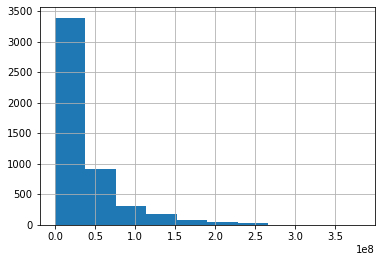

In [35]:
df_movies['movie_budget'].hist()

## Study the relationship of `movie_budget` and `movie_revenue` by scatterplot

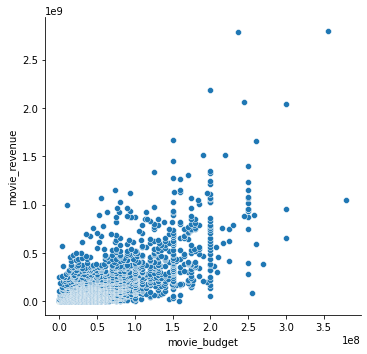

In [36]:
sns.relplot(data=df_movies, x='movie_budget', y='movie_revenue')

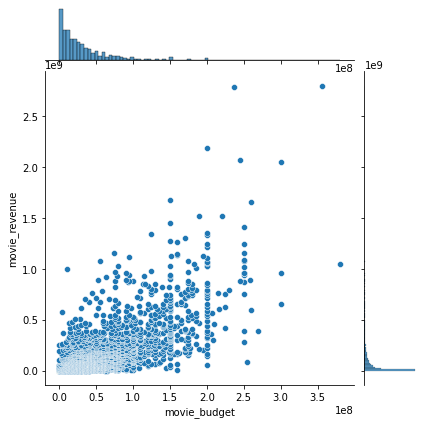

In [37]:
sns.jointplot(data=df_movies, x='movie_budget', y='movie_revenue')

## Who are the top 10 actors, where the movies they played in have the most total `movie_revenue`

In [38]:
df_movie_actors.groupby(['actor_id', 'actor_name'])['movie_revenue'].sum().nlargest(10)

actor_id  actor_name        
7624      Stan Lee              30513647785
2231      Samuel L. Jackson     26563727612
15831     Frank Welker          19127637846
84495     Jess Harnell          17965605716
1245      Scarlett Johansson    16423470258
11184     Warwick Davis         15904065259
21088     Alan Tudyk            15574055338
84493     Mickie McGowan        15396836203
7907      John Ratzenberger     14911889467
78317     Bob Bergen            14796273137
Name: movie_revenue, dtype: int64

## Who are the top 10 actors, where the movies they played leading roles in have the most total `movie_revenue`

In [39]:
msk = df_movie_actors['actor_order'] < 3
df_movie_actors[msk].groupby(['actor_id', 'actor_name'])['movie_revenue'].sum().nlargest(10)

actor_id  actor_name       
3223      Robert Downey Jr.    14259306758
16828     Chris Evans          10004861753
31        Tom Hanks             9873387447
10990     Emma Watson           9669044684
18918     Dwayne Johnson        9331711173
2888      Will Smith            9323309724
85        Johnny Depp           9261465099
500       Tom Cruise            9091922150
1327      Ian McKellen          8031082088
10980     Daniel Radcliffe      7880940606
Name: movie_revenue, dtype: int64